In [90]:
import numpy as np
import pandas as pd
import re
from ast import literal_eval
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import math
import time
import random
import matplotlib.pyplot as plt
device = torch.device("cuda")

In [91]:
url = "https://raw.githubusercontent.com/lmu-mandy/project-rgt/bob-branch/ted_talks_en.csv"
df = pd.read_csv(url)
df = df.loc[:, ['talk_id', 'topics', 'transcript']]
df.head()

,talk_id,topics,transcript
0,1,"['alternative energy', 'cars', 'climate change...","Thank you so much, Chris. And it's truly a gre..."
1,92,"['Africa', 'Asia', 'Google', 'demo', 'economic...","About 10 years ago, I took on the task to teac..."
2,7,"['computers', 'entertainment', 'interface desi...","(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,"['MacArthur grant', 'activism', 'business', 'c...",If you're here today — and I'm very happy that...
4,66,"['children', 'creativity', 'culture', 'dance',...",Good morning. How are you? (Audience) Good. It...


In [92]:
sep_topics = df.topics.unique()
topics = []

for topic in sep_topics:
    for i in topic.split(","):
        topics.append(i.split("'")[1])
print(topics[0:5])

['alternative energy', 'cars', 'climate change', 'culture', 'environment']


In [93]:
unique_topics = [] 
      
# traverse for all elements 
for topic in topics: 
    # check if exists in unique_list or not 
    if topic not in unique_topics: 
            unique_topics.append(topic) 
print(unique_topics)

['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'Africa', 'Asia', 'Google', 'demo', 'economics', 'health', 'statistics', 'global development', 'visualizations', 'math', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'children', 'creativity', 'dance', 'education', 'parenting', 'teaching', 'architecture', 'collaboration', 'design', 'library', 'Christianity', 'God', 'atheism', 'comedy', 'religion', 'storytelling', 'humor', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy', 'happiness', 'leadership', 'motivation', 'philanthropy', 'TED Prize', 'film', 'peace', 'social change', 'art', 'movies', 'disease', 'ebola', 'disaster relief', 'invention', 'open-source', 'entrepreneur', 'piano', 'wunderkind', 'live music', 'violin', '

In [94]:
def find_topic(topic):
    """Returns a list of booleans for talks that contain a topic by index.
    
    :param topic: Topics or related topics of a talk
    """
    has_topic = []
    for t_list in df['topics']:
        if topic.lower() in literal_eval(t_list):
            has_topic.append(1)
        else:
            has_topic.append(0)
    return has_topic

In [95]:
# add columns for selected topics
df['is_science'] = find_topic('science')
df['is_technology'] = find_topic('technology')
df['is_math'] = find_topic('math')
df['is_computers'] = find_topic('computers')
df['is_engineering'] = find_topic('engineering')
df['is_ML'] = find_topic('machine learning')
df['is_software'] = find_topic('software')
df['is_statistics'] = find_topic('statistics')
df['is_cognitive_science'] = find_topic('cognitive science')
df['is_science_and_art'] = find_topic('science and art')
df['is_physics'] = find_topic('physics')
df['is_quantum_physics'] = find_topic('quantum physics')
df['is_code'] = find_topic('code')
df['is_programming'] = find_topic('programming')
df['is_chemistry'] = find_topic('chemistry')
df['is_data'] = find_topic('data')
df.head()

,talk_id,topics,transcript,is_science,is_technology,is_math,is_computers,is_engineering,is_ML,is_software,is_statistics,is_cognitive_science,is_science_and_art,is_physics,is_quantum_physics,is_code,is_programming,is_chemistry,is_data
0,1,"['alternative energy', 'cars', 'climate change...","Thank you so much, Chris. And it's truly a gre...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,92,"['Africa', 'Asia', 'Google', 'demo', 'economic...","About 10 years ago, I took on the task to teac...",0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7,"['computers', 'entertainment', 'interface desi...","(Music: ""The Sound of Silence,"" Simon & Garfun...",0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,53,"['MacArthur grant', 'activism', 'business', 'c...",If you're here today — and I'm very happy that...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66,"['children', 'creativity', 'culture', 'dance',...",Good morning. How are you? (Audience) Good. It...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# filter DataFrame to only include talks about sex, religion, and politics
df = df.loc[(df['is_science']==1) | (df['is_technology']==1) | 
            (df['is_math']==1) | (df['is_computers']==1) |
            (df['is_engineering']==1) | (df['is_ML']==1) | 
            (df['is_software'] == 1) | (df['is_statistics'] == 1) | 
            (df['is_cognitive_science'] == 1) | (df['is_science_and_art'] == 1) | 
            (df['is_physics'] == 1) | (df['is_quantum_physics'] == 1) | 
            (df['is_code'] == 1) | (df['is_programming'] == 1) | 
            (df['is_chemistry'] == 1) | df['is_data'] == 1, : ].reset_index(drop=True)

# create new DataFrames for each topic (for later use)
science_df = df.loc[(df['is_science']==1), 'talk_id':'transcript'].reset_index(drop=True)
technology_df = df.loc[(df['is_technology']==1), 'talk_id':'transcript'].reset_index(drop=True)
math_df = df.loc[(df['is_math']==1), 'talk_id':'transcript'].reset_index(drop=True)
computers_df = df.loc[(df['is_computers']==1), 'talk_id':'transcript'].reset_index(drop=True)
engineering_df = df.loc[(df['is_engineering']==1), 'talk_id':'transcript'].reset_index(drop=True)
ML_df = df.loc[(df['is_ML']==1), 'talk_id':'transcript'].reset_index(drop=True)
software_df = df.loc[(df['is_software']==1), 'talk_id':'transcript'].reset_index(drop=True)
statistics_df = df.loc[(df['is_statistics']==1), 'talk_id':'transcript'].reset_index(drop=True)
cognitive_science_df = df.loc[(df['is_cognitive_science']==1), 'talk_id':'transcript'].reset_index(drop=True)
science_and_art_df = df.loc[(df['is_science_and_art']==1), 'talk_id':'transcript'].reset_index(drop=True)
physics_df = df.loc[(df['is_physics']==1), 'talk_id':'transcript'].reset_index(drop=True)
quantum_physics_df = df.loc[(df['is_quantum_physics']==1), 'talk_id':'transcript'].reset_index(drop=True)
code_df = df.loc[(df['is_code']==1), 'talk_id':'transcript'].reset_index(drop=True)
programming_df = df.loc[(df['is_programming']==1), 'talk_id':'transcript'].reset_index(drop=True)
chemistry_df = df.loc[(df['is_chemistry']==1), 'talk_id':'transcript'].reset_index(drop=True)
data_df = df.loc[(df['is_data']==1), 'talk_id':'transcript'].reset_index(drop=True)

print('Science', science_df.shape)
print('Technology', technology_df.shape)
print('Math', math_df.shape)
print('Computers', computers_df.shape)
print('Engineering', engineering_df.shape)
print('Machine Learning', ML_df.shape)
print('Software', software_df.shape)
print('Statistics', statistics_df.shape)
print('Cognitive Science', cognitive_science_df.shape)
print('Science and Art', science_and_art_df.shape)
print('Physics', physics_df.shape)
print('Quantum Physics', quantum_physics_df.shape)
print('Code', code_df.shape)
print('Programming', programming_df.shape)
print('Chemistry', chemistry_df.shape)
print('Data', data_df.shape)

Science (993, 3)
Technology (979, 3)
Math (137, 3)
Computers (167, 3)
Engineering (156, 3)
Machine Learning (38, 3)
Software (61, 3)
Statistics (36, 3)
Cognitive Science (71, 3)
Science and Art (45, 3)
Physics (128, 3)
Quantum Physics (17, 3)
Code (37, 3)
Programming (34, 3)
Chemistry (55, 3)
Data (142, 3)


In [97]:
def combine_transcripts(transcript_list):
    """Input a list of transcripts and return them as a corpus.
    :param list_of_text: Transcript list"""
    corpus = ' '.join(transcript_list)
    return corpus

def transcripts_to_dict(df, topic_list):
    """Returns a dictionary of transcripts for each topic.
    
    :param df: DataFrame
    :param topic_list: List of topics
    """
    ted_dict = {}
    for topic in topic_list:
        # filter DataFrame to specific series and convert it to a list
        filter_string = 'is_' + str(topic)
        text_list = df.loc[(df[filter_string] == 1), 'transcript'].to_list()

        # call combine_transcripts function to return combined text
        combined_text = combine_transcripts(text_list)

        # add combined text to dict
        ted_dict[topic] = combined_text
    return ted_dict

In [98]:
# create dictionary from the DataFrame
transcript_dict = transcripts_to_dict(df, ['science', 'technology', 'math', 'computers', 'engineering', 'ML', 
                                           'software', 'statistics', 'cognitive_science', 'science_and_art', 'physics', 
                                           'quantum_physics', 'code', 'programming', 'chemistry', 'data'])

# construct DataFrame from dictionary
df = pd.DataFrame.from_dict(transcript_dict, orient='index')
df.rename({0: 'transcript'}, axis=1, inplace=True)

df

,transcript
science,"Thank you so much, Chris. And it's truly a gre..."
technology,"Thank you so much, Chris. And it's truly a gre..."
math,"About 10 years ago, I took on the task to teac..."
computers,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
engineering,"In terms of invention, I'd like to tell you th..."
ML,"I know this is going to sound strange, but I t..."
software,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
statistics,"About 10 years ago, I took on the task to teac..."
cognitive_science,It's wonderful to be back. I love this wonderf...
science_and_art,My name is Lovegrove. I only know nine Lovegro...


In [99]:
def clean_text(text):
    """Returns clean text.
    Removes:
        *text in square brackets & parenthesis
        *punctuation
        *words containing numbers
        *double-quotes, dashes
    """
#     text = text.lower()
    text = re.sub('[\[\(].*?[\)\]]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[\“\–]', '', text)
    return text

In [100]:
# clean text
df['transcript'] = pd.DataFrame(df['transcript'].apply(lambda x: clean_text(x)))
science_df['transcript'] = pd.DataFrame(science_df['transcript'].apply(lambda x: clean_text(x)))
technology_df['transcript'] = pd.DataFrame(technology_df['transcript'].apply(lambda x: clean_text(x)))
math_df['transcript'] = pd.DataFrame(math_df['transcript'].apply(lambda x: clean_text(x)))
computers_df['transcript'] = pd.DataFrame(computers_df['transcript'].apply(lambda x: clean_text(x)))
engineering_df['transcript'] = pd.DataFrame(engineering_df['transcript'].apply(lambda x: clean_text(x)))
ML_df['transcript'] = pd.DataFrame(ML_df['transcript'].apply(lambda x: clean_text(x)))
software_df['transcript'] = pd.DataFrame(software_df['transcript'].apply(lambda x: clean_text(x)))
statistics_df['transcript'] = pd.DataFrame(statistics_df['transcript'].apply(lambda x: clean_text(x)))
cognitive_science_df['transcript'] = pd.DataFrame(cognitive_science_df['transcript'].apply(lambda x: clean_text(x)))
science_and_art_df['transcript'] = pd.DataFrame(science_and_art_df['transcript'].apply(lambda x: clean_text(x)))
physics_df['transcript'] = pd.DataFrame(physics_df['transcript'].apply(lambda x: clean_text(x)))
quantum_physics_df['transcript'] = pd.DataFrame(quantum_physics_df['transcript'].apply(lambda x: clean_text(x)))
code_df['transcript'] = pd.DataFrame(code_df['transcript'].apply(lambda x: clean_text(x)))
programming_df['transcript'] = pd.DataFrame(programming_df['transcript'].apply(lambda x: clean_text(x)))
chemistry_df['transcript'] = pd.DataFrame(chemistry_df['transcript'].apply(lambda x: clean_text(x)))
data_df['transcript'] = pd.DataFrame(data_df['transcript'].apply(lambda x: clean_text(x)))

In [101]:
dfs = [science_df, technology_df, math_df, computers_df, engineering_df, ML_df,
       software_df, statistics_df, cognitive_science_df, science_and_art_df, physics_df, 
       quantum_physics_df, code_df, programming_df, chemistry_df, data_df]

#dfs = [science_df]
       
comb_df = pd.concat(dfs)

In [102]:
comb_df.drop_duplicates().reset_index(drop=True)

,talk_id,topics,transcript
0,1,"['alternative energy', 'cars', 'climate change...","Thank you so much, Chris. And it's truly a gre..."
1,58,"['TED Prize', 'collaboration', 'disease', 'ebo...",I'm the luckiest guy in the world. I got to se...
2,16,"['cognitive science', 'culture', 'evolution', ...",I'd like to talk today about the two biggest s...
3,98,"['astronomy', 'biology', 'cognitive science', ...","My title: ""Queerer than we can suppose: the st..."
4,47,"['climate change', 'cosmos', 'culture', 'envir...",We've been told to go out on a limb and say so...
...,...,...,...
1843,20554,"['communication', 'compassion', 'identity', 'd...",We live in a world where the collection of dat...
1844,39331,"['social change', 'social media', 'democracy',...","So, on the day after the Brexit vote, in June ..."
1845,46535,"['inequality', 'crime', 'justice system', 'cul...",When people meet me for the first time on my j...
1846,53582,"['news', 'Internet', 'social media', 'global i...","So, on April of , the Associated Press put ou..."


In [103]:
#comb_df
scripts = comb_df["transcript"].to_numpy()

In [104]:
new_scripts = []
length_sents = []

for i in range(len(scripts)):
  script = re.sub('\.', ' <eos>', scripts[i])
  script = re.sub('\!', ' <eos>', script)
  script = re.sub('\?', ' <eos>', script)
  script = re.sub('\,', '', script)
  script = re.sub('\;', '', script)
  script = re.sub('\:', '', script)
  script = re.sub('\—', '', script)
  script = re.sub('\-', '', script)
  script = re.sub('\"', '', script)
  script = re.sub('  ', ' ', script)
  script = re.sub('  ', ' ', script)
  script = re.sub('<eos> <eos> <eos>', '', script)
  new_scripts.append(script)

  sen_lengths = []
  split_sents = script.split('<eos>')

  for sent in split_sents:
    words = sent.split(' ')
    length = len(words)
    sen_lengths.append(length)

  length_sents.append(sen_lengths)

In [105]:
list_idx = []
for i in range(len(length_sents)):
    max_num = max(length_sents[i])
    if max_num >= 50:
        list_idx.append(i)

for i in range(len(list_idx)):
    new_scripts.pop(list_idx[i] - i)

In [106]:
len(new_scripts)

1141

In [108]:
big_script = []
for i in range(len(new_scripts)):
  for j in range(len(new_scripts[i].split())):
    words = new_scripts[i].split()
    word = words[j].lower()
    big_script.append(word)

#big_script = ' '.join(big_script)

In [110]:
word_counts = {}

start = time.time()
for i in range(len(big_script)):
    if big_script[i] in word_counts:
      word_counts[big_script[i]] += 1
    else:
      word_counts[big_script[i]] = 1
elapsed = time.time() - start
print(elapsed/60)

0.007661255200703939


In [113]:
word_counts_list = []
for key in word_counts:
  word_counts_list.append((key, word_counts[key]))

In [ ]:
ordered_list = sorted(word_counts_list, key = lambda word: word[1], reverse=True)
print(len(ordered_list))
ordered_list = ordered_list[0:10000]
ordered_list

In [115]:
word2idx = {}
for i in range(len(ordered_list)):
  word2idx[ordered_list[i][0]] = i
print(len(word2idx))
word2idx['<unk>'] = len(word2idx)
print(len(word2idx))

10000
10001


In [ ]:
word2idx

In [119]:
big_script_idx = []
big_script_words = []

for word in big_script:
    if word in word2idx:
        big_script_words.append(word)
        big_script_idx.append(word2idx[word])
    else:
        big_script_words.append('<unk>')
        big_script_idx.append(len(word2idx)-1)

#big_script_words = ' '.join(big_script_words)

In [122]:
# creates sequences of a certain length

seq_length = 32

text_words_seq = []
text_idx_seq = []

start = time.time()
for i in range(len(big_script_words) - seq_length):
  seq_wds = ' '.join(big_script_words[i : i + seq_length])
  text_words_seq.append(seq_wds)

  seq_idxs = big_script_idx[i : i + seq_length]
  text_idx_seq.append(seq_idxs)
elapsed = time.time() - start
print(elapsed/60)

0.0831854780515035


In [139]:
data = torch.tensor(text_idx_seq)

# 80 percent train, 10 percent validation, 10 percent test split

end1 = round(len(text_words_seq)*.9) # to get 90% for training
end2 = round(len(text_words_seq)*.95) # to get 5% for validation and test
print(end1)
print(end2)

train_data = data[0:end1]
val_data = data[end1:end2]
test_data = data[end2:]

1367515
1443488


In [140]:
class twoLayer_LSTM(nn.Module):
    def __init__(self, vocab_size, hidden_size, layers):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, hidden_size)
        self.rec_layer = nn.LSTM(hidden_size, hidden_size, num_layers=layers)
        self.lin_layer = nn.Linear(hidden_size, vocab_size)
        # if want to make bi directional
        #self.rec_layer = nn.LSTM(hidden_size, hidden_size, num_layers=layers, bidirectional=True)
        #self.lin_layer = nn.Linear(hidden_size*2, vocab_size)

    def forward(self, word_seq, h_init, c_init):
        g_seq = self.emb_layer(word_seq)  
        h_seq, (h_last, c_last) = self.rec_layer(g_seq, (h_init, c_init))
        score_seq = self.lin_layer(h_seq)
        return score_seq, (h_last, c_last)

In [141]:
def evaluate(data):
    running_loss = 0
    num_batches = 0    
    with torch.no_grad():
        h = torch.zeros(layers, bs, hidden_size)
        c = torch.zeros(layers, bs, hidden_size)
        h = h.to(device)
        c = c.to(device)
        for count in range(0, len(data) - bs, bs):
            minibatch_data = data[count:count + bs]
            minibatch_label = data[count+1:count + bs + 1]
            minibatch_data = minibatch_data.to(device)
            minibatch_label = minibatch_label.to(device)
            scores, (h, c) = net(minibatch_data, h, c)
            minibatch_label = minibatch_label.view(bs * seq_length) 
            scores = scores.view(bs * seq_length, vocab_size)
            loss = criterion(scores, minibatch_label)    
            h = h.detach()
            c = c.detach()
            num_batches += 1  
    return loss.item()

In [ ]:
def normalize_gradient(net):
    grad_norm_sq = 0
    for p in net.parameters():
        grad_norm_sq += p.grad.data.norm()**2
    grad_norm = math.sqrt(grad_norm_sq)
    if grad_norm < 1e-4:
        net.zero_grad()
        print('grad norm close to zero')
    else:    
        for p in net.parameters():
             p.grad.data.div_(grad_norm)
    return grad_norm

In [177]:
# setup NN
hidden_size = 100
vocab_size = len(word2idx)+1
layers = 2
num_epoch = 5
bs = 32

net = twoLayer_LSTM(vocab_size, hidden_size, layers)
net.emb_layer.weight.data.uniform_(-0.1, 0.1)
net.lin_layer.weight = net.emb_layer.weight
net = net.to(device)
criterion = nn.CrossEntropyLoss()
train_size = len(train_data)

In [ ]:
# training with SGD
start = time.time()

train_loss_list = []
val_loss_list = []
test_loss_list = []

for epoch in range(num_epoch):
    
    #if epoch > 1:
    my_lr = 1.5 * math.exp(-0.25 * epoch)
    optimizer = optim.Adagrad(net.parameters(), lr=my_lr)
            
    # set the running quantities to zero at the beginning of the epoch
    running_loss = 0
    num_batches = 0    
       
    # set the initial h to be the zero vector
    h = torch.zeros(layers, bs, hidden_size)
    c = torch.zeros(layers, bs, hidden_size)
    # send it to the gpu    
    h = h.to(device)
    c = c.to(device)

    for count in range(0, train_size - bs, bs):    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch
        minibatch_data = train_data[count : count + bs]
        minibatch_label = train_data[count + 1 : count + bs + 1]
                
        # send them to the gpu
        minibatch_data = minibatch_data.to(device)
        minibatch_label = minibatch_label.to(device)
        
        # Detach to prevent from backpropagating all the way to the beginning
        # Then tell Pytorch to start tracking all operations that will be done on h and c
        h = h.detach()
        c = c.detach()
        h = h.requires_grad_()
        c = c.requires_grad_()
        # forward the minibatch through the net 
        scores, (h, c) = net(minibatch_data, h, c)
        # reshape the scores and labels to huge batch of size bs*seq_length
        scores = scores.view(bs * seq_length, vocab_size)  
        minibatch_label = minibatch_label.view(bs * seq_length)       
        
        # Compute the average of the losses of the data points in this huge batch
        loss = criterion(scores, minibatch_label)
        
        # backward pass to compute dL/dR, dL/dV and dL/dW
        loss.backward()

        # do one step of stochastic gradient descent: R=R-lr(dL/dR), V=V-lr(dL/dV), ...
        normalize_gradient(net)
        optimizer.step()
        
        # update the running loss  
        #running_loss += loss.item()
        num_batches += 1
                          
    #total_loss = running_loss/num_batches
    elapsed = time.time() - start
    print('\nepoch =', epoch, '\t time = {0:.1f}'.format(elapsed/60),'\t lr = {0:.3f}'.format(my_lr), '\t training loss = {0:.3f}'.format(loss.item())) # compute error on the test set at end of each epoch
    val_loss = evaluate(val_data) # eval on the validation set
    train_loss_list.append(loss.item())
    val_loss_list.append(val_loss)
    test_loss = evaluate(test_data) # eval on the test set
    test_loss_list.append(test_loss)
    print('val loss = {0:.3f}'.format(val_loss))
    print('test loss = {0:.3f}'.format(test_loss))

print(" ")

In [ ]:
# training with Adagrad
start = time.time()

train_loss_list = []
val_loss_list = []
test_loss_list = []

for epoch in range(num_epoch):
    #if epoch > 0:
    my_lr = 0.1 * math.exp(-0.5 * epoch)
    optimizer = optim.Adagrad(net.parameters(), lr=my_lr)
            
    # set the running quantities to zero at the beginning of the epoch
    running_loss = 0
    num_batches = 0    
       
    # set the initial h to be the zero vector
    h = torch.zeros(layers, bs, hidden_size)
    c = torch.zeros(layers, bs, hidden_size)
    # send it to the gpu    
    h = h.to(device)
    c = c.to(device)

    for count in range(0, train_size - bs, bs):    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch
        minibatch_data = train_data[count : count + bs]
        minibatch_label = train_data[count + 1 : count + bs + 1]        
                
        # send them to the gpu
        minibatch_data = minibatch_data.to(device)
        minibatch_label = minibatch_label.to(device)
        
        # Detach to prevent from backpropagating all the way to the beginning
        # Then tell Pytorch to start tracking all operations that will be done on h and c
        h = h.detach()
        c = c.detach()
        h = h.requires_grad_()
        c = c.requires_grad_()
        # forward the minibatch through the net 
        scores, (h, c) = net(minibatch_data, h, c)
        # reshape the scores and labels to huge batch of size bs*seq_length
        scores = scores.view(bs * seq_length, vocab_size)  
        minibatch_label = minibatch_label.view(bs * seq_length)       
        
        # Compute the average of the losses of the data points in this huge batch
        loss = criterion(scores, minibatch_label)
        
        # backward pass to compute dL/dR, dL/dV and dL/dW
        loss.backward()

        # do one step of stochastic gradient descent: R=R-lr(dL/dR), V=V-lr(dL/dV), ...
        normalize_gradient(net)
        optimizer.step()
        
        # update the running loss  
        #running_loss += loss.item()
        num_batches += 1
                          
    #total_loss = running_loss/num_batches
    elapsed = time.time() - start
    print('\nepoch =', epoch, '\t time = {0:.1f}'.format(elapsed),'\t lr = {0:.3f}'.format(my_lr), '\t training loss = {0:.3f}'.format(loss.item())) # compute error on the test set at end of each epoch
    val_loss = evaluate(val_data) # eval on the validation set
    train_loss_list.append(loss.item())
    val_loss_list.append(val_loss)
    test_loss = evaluate(test_data) # eval on the test set
    test_loss_list.append(test_loss)
    print('val loss = {0:.3f}'.format(val_loss))
    print('test loss = {0:.3f}'.format(test_loss))

print(" ")

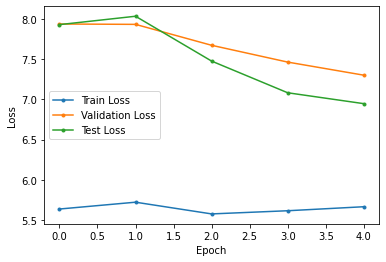

In [173]:
x = range(0, num_epoch,1)

plt.plot(x, train_loss_list, '.-', label='Train Loss')
plt.plot(x, val_loss_list, '.-', label='Validation Loss')
plt.plot(x, test_loss_list, '.-', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
param = net.state_dict()
torch.save(param, 'trained_parameters_LSTM.pt')

In [146]:
idx2word = {y:x for x, y in word2idx.items()}

In [147]:
def show_most_likely_words(prob):
    num_word_display = 15
    p = prob.view(-1)
    p, word_idx = torch.topk(p, num_word_display)
    for i, idx in enumerate(word_idx):
        percentage = p[i].item() * 100
        word = idx2word[idx.item()]
        print("{:.1f}%\t".format(percentage), word) 

def text2tensor(text):
    text = text.lower()
    list_of_words = text.split()
    list_of_idx = []
    for w in list_of_words:
      if w in word2idx:
        idx = word2idx[w]
        list_of_idx.append(idx)
      else:
        list_of_idx.append(len(word2idx)-1)
    x = torch.LongTensor(list_of_idx)
    return x

In [174]:
sentence = "machine learning is"

h = torch.zeros(layers, bs, hidden_size)
c = torch.zeros(layers, bs, hidden_size)
h = h.to(device)
c = c.to(device)

data = text2tensor(sentence)
seq_len = len(data)
data = data.view(seq_len, -1)
empty = torch.zeros(seq_len, bs - 1).type(torch.LongTensor)
data = torch.cat((data, empty), dim=1)
data = data.to(device)
scores, (h, c) = net(data, h, c)
scores = scores[seq_len - 1, 0, :]
p = F.softmax(scores.view(1, vocab_size), dim=1)
print(sentence, '... \n')
show_most_likely_words(p)

machine learning is ... 

9.2%	 <eos>
4.9%	 the
4.6%	 a
4.0%	 is
3.8%	 how
3.2%	 that
2.4%	 it
2.0%	 and
1.7%	 about
1.5%	 down
1.4%	 of
1.4%	 we
1.3%	 up
1.1%	 light
1.1%	 in
